<h1>Homework Stats and Tracking</h1>

Check out this project in Colab:
<a href="https://colab.research.google.com/github/SydneyDanger/syd-ml-zoomcamp/blob/main/tools/ml_zoomcamp_hw_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from hashlib import sha1
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

def compute_hash(email):
    return sha1(email.lower().encode('utf-8')).hexdigest()

email = 'sydneyoreilly@gmail.com'
your_hash = compute_hash(email)
### OR ### Hardcode a hash for testing
#your_hash = 'eaecbc75eeb043c71a56a47b971d3701bc0f1cca'

# leaderboard url
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSNK_yGtELX1RJK1SSRl4xiUbD0XZMYS6uwHnybc7Mql-WMnMgO7hHSu59w-1cE7FeFZjkopbh684UE/pubhtml#'

In [60]:
# use pandas to grab all df's from google sheet
df_list = pd.read_html(url, header=1)

# clean and separate dataframes
for i in range(len(df_list)):
    df_list[i] = df_list[i].drop(df_list[i].index[0])
    df_list[i] = df_list[i].drop(df_list[i].columns[0], axis=1)

# ignore intro tab
df_homework = df_list[1:len(df_list)-1]
df_leaderboard = df_list[-1:]

# check data was found
print(f"{len(df_homework)} assignments found")

2 assignments found


In [61]:
# print personal homework stats for each assignment, and place on leaderboard
assignment_number = 1 # for printing

# loop through all homework assignment df's
for df in df_homework:
    print(f"Homework {assignment_number}:")
    row = df[df.iloc[:, 0] == your_hash]
    if not row.empty:
        # count number of questions
        questions = sum(1 for col in row if col.startswith('question'))
        
        # calculate score
        score = sum(1 for col in row if col.startswith('question') and row[col].values[0] == 1.0)
        print(f"Your score: {score}/{questions} ({(score/questions):.0%})\n")
        
        # show bonus points
        lip_bonus = row['learning_in_public'].values[0]
        faq_bonus = row['faq_score'].values[0]
        valid_code = row['valid_code_link'].values[0]
        
        print(f"Learning in Public Bonus: {lip_bonus}")
        print(f"FAQ Contribution Bonus:   {faq_bonus}")
        print(f"Valid code? {valid_code}")
        
        display(row.iloc[:, 1:])
    else:
        print("Score not found for this assignment")
    assignment_number += 1
    print('\n')

# calculate leaderboard position, total score, and highest score for later
leaderboard_position = df_leaderboard[0].index[df_leaderboard[0].iloc[:, 0] == your_hash][0] #.tolist()
total_score = df_leaderboard[0].loc[leaderboard_position, 'total']
highest_score = 30

if leaderboard_position:
    print("Leaderboard:")
    place = df_leaderboard[0].iloc[leaderboard_position]
    print(f"You are at position {leaderboard_position}/{len(df_leaderboard[0])} on the leaderboard.")
else:
    print("You are not on the leaderboard.")

Homework 1:
Your score: 7/7 (100%)

Learning in Public Bonus: 1.0
FAQ Contribution Bonus:   0.0
Valid code? True


,question1,question2,question3,question4,question5,question6,question7,learning_in_public,faq_score,valid_code_link,total_score
129,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True,8.0




Homework 2:
Your score: 6/6 (100%)

Learning in Public Bonus: 1.0
FAQ Contribution Bonus:   0.0
Valid code? True


,question1,question2,question3,question4,question5,question6,learning_in_public,faq_score,valid_code_link,total_score
101,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True,7.0




Leaderboard:
You are at position 83/833 on the leaderboard.


<h1>Fun Analytics!</h1>

<h3>Histogram for visualizing all scores on the leaderboard</h3>
Contributed by Sylvia on Slack

In [9]:
# Run if needed! Better to just install in your env
!pip install lxml ipywidgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
Building jupyterlab assets (production, minimized)


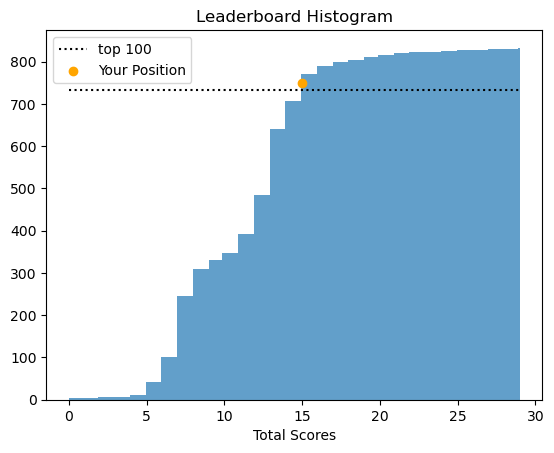

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\sydne\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\sydne\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionReset

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\sydne\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\sydne\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionReset

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\sydne\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\sydne\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\sydne\anaconda3\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionReset

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_leaderboard_histogram(df_leaderboard: pd.DataFrame, total_score: int = None, leaderboard_position: int = None):
    # Plotting the histogram
    ax = df_leaderboard.total.hist(bins=200, cumulative=True, alpha=.7)
    ax.grid(False)
    
    n = len(df_leaderboard)
    ax.hlines(n-100, xmin=0, xmax=df_leaderboard.total.max(), color='black', linestyles=':', label='top 100')
    
    if total_score is not None and leaderboard_position is not None:
        # Plotting the user's position
        ax.scatter(x=total_score, y=n - leaderboard_position, color='orange', marker='o', label='Your Position')
    
    ax.set_xlabel('Total Scores')
    ax.set_title('Leaderboard Histogram')
    ax.legend()
    
    plt.show()

# plot leaderboard
plot_leaderboard_histogram(df_leaderboard[0], total_score, leaderboard_position)